<a href="https://colab.research.google.com/github/Bast1-py/Experience-Developing-Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install kagglehub

In [ ]:
# pip install kagglehub[pandas-datasets]

In [ ]:
# pip install catboost

In [ ]:
# pip install scikit-optimize

In [ ]:
# pip install keras

In [ ]:
# pip install tensorflow

In [ ]:
# Import necessary libraries for data analysis, visualization, and machine learning
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd

# Library for Class Imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Importing libraries for machine learning model building and evaluation
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, precision_score

import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, LeakyReLU, ELU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.regularizers import l2

# Suppressing warnings to keep the output clean and focused on results
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
sns.set_context('talk', font_scale=0.6)

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Churn_Modelling.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abdullahkhan098/churndata",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

# print("First 5 records:", df.head())
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
df_analisis = df.copy()

In [ ]:
type_churn = df_analisis['Exited'].unique()
type(type_churn), type_churn

(numpy.ndarray, array([1, 0]))

In [ ]:
df_analisis['Churn'] = df_analisis['Exited'].replace(
    {0: 'Exited',
     1: 'Not Exited'}
)
df_analisis.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Exited
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exited


In [ ]:
not_exited = df_analisis[df_analisis['Churn']=='Not Exited']
not_exited

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not Exited
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not Exited
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Not Exited
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Not Exited
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,Not Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1,Not Exited
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,Not Exited
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,Not Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Not Exited


In [ ]:
exited = df_analisis[df_analisis['Churn']=='Exited']
exited

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exited
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Exited
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,Exited
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Exited
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Exited


In [ ]:
male = df_analisis[df_analisis['Gender']=='Male']
male

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Not Exited
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Exited
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Exited
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Exited
10,11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0,Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0,Exited
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Exited
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Exited


In [ ]:
female = df_analisis[df_analisis['Gender']=='Female']
female

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Exited
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,Not Exited
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,Not Exited
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Not Exited


In [ ]:
germany = df_analisis[df_analisis['Geography']=='Germany']
germany

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Not Exited
15,16,15643966,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,Exited
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,Not Exited
26,27,15736816,Young,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,Exited
28,29,15728693,McWilliams,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1,Not Exited
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0,Exited
9986,9987,15581736,Bartlett,673,Germany,Male,47,1,183579.54,2,0,1,34047.54,0,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0,Exited


In [ ]:
france = df_analisis[df_analisis['Geography']=='France']
france

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not Exited
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not Exited
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Exited
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Exited
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Exited
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Exited
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Not Exited


In [ ]:
spain = df_analisis[df_analisis['Geography']=='Spain']
spain

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exited
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Not Exited
11,12,15737173,Andrews,497,Spain,Male,24,3,0.00,2,1,0,76390.01,0,Exited
14,15,15600882,Scott,635,Spain,Female,35,7,0.00,2,1,1,65951.65,0,Exited
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,9967,15590213,Ch'en,479,Spain,Male,35,4,125920.98,1,1,1,20393.44,0,Exited
9980,9981,15719276,T'ao,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0,Exited
9987,9988,15588839,Mancini,606,Spain,Male,30,8,180307.73,2,1,1,1914.41,0,Exited
9989,9990,15605622,McMillan,841,Spain,Male,28,4,0.00,2,1,1,179436.60,0,Exited


In [ ]:
type_churn = df_analisis['Churn'].unique()
type(type_churn), type_churn

(numpy.ndarray, array(['Not Exited', 'Exited'], dtype=object))

In [ ]:
type_geo = df_analisis['Geography'].unique()
type(type_geo), type_geo

(numpy.ndarray, array(['France', 'Spain', 'Germany'], dtype=object))

In [ ]:
type_gender = df_analisis['Gender'].unique()
type(type_gender), type_gender

(numpy.ndarray, array(['Female', 'Male'], dtype=object))

In [ ]:
type_churn = df_analisis['Churn'].value_counts().index.tolist()
type_geo = df_analisis['Geography'].value_counts().index.tolist()
type_gender = df_analisis['Gender'].value_counts().index.tolist()

# Exploratory Data Analysis

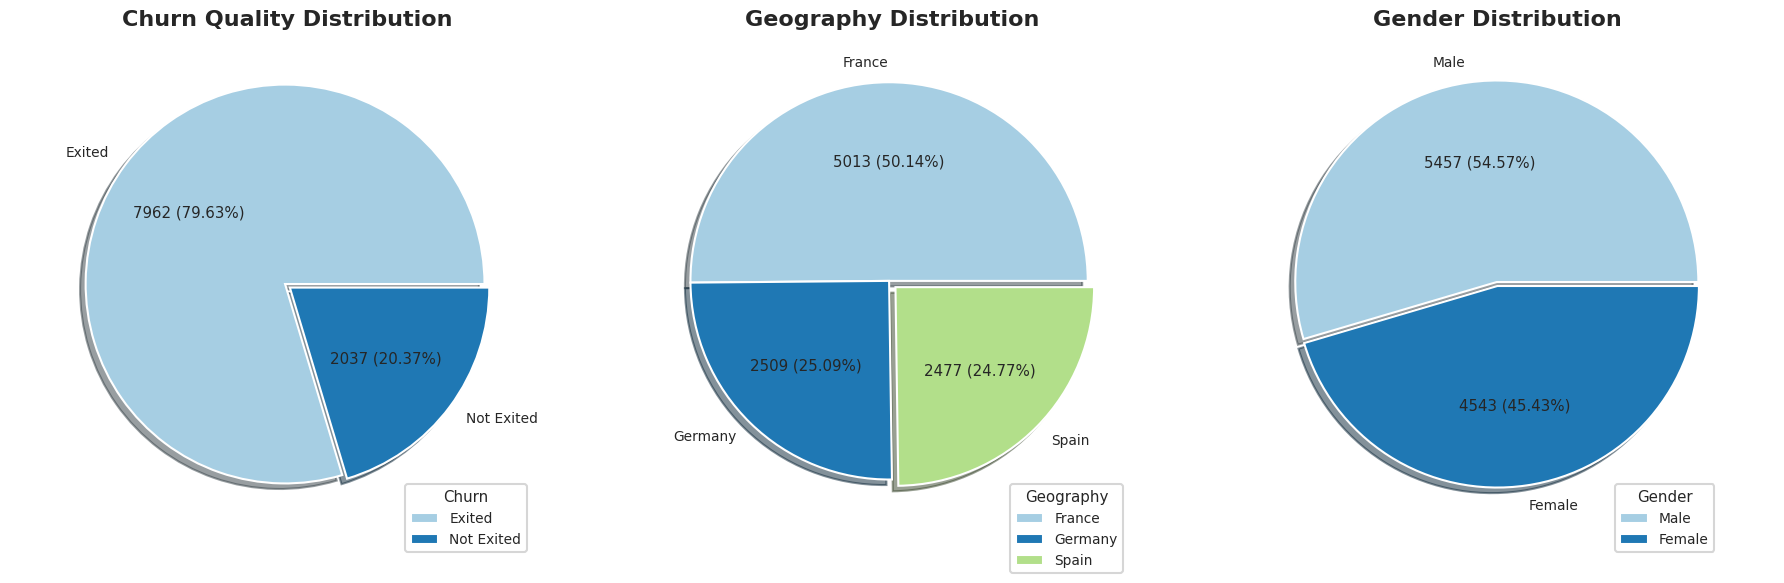

In [ ]:
# membuat figure dan axes untuk subplot 1x3
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

# membuat daftar fitur kategori yang akan di visualisasikan
cat = ['Churn', 'Geography', 'Gender']
explode = [[0, 0.03], [0, 0, 0.045], [0, 0.02]] # Menentukan efek explode untuk tiap kategori agar beberapa bagian lebih menonjol dalam pie chart
# menentukan judul dari ke 3 fitur yang akan divisualisasikan
titles = ['Churn Quality Distribution',
          'Geography Distribution',
          'Gender Distribution']
labels_list = [type_churn, type_geo, type_gender] # daftar label yang sudah ditemukan

# define color palette
palette_color = sns.color_palette('Paired')

# Fungsi untuk menampilkan jumlah dan persentase dalam label pie chart
def autopct_with_count(pct, allvalues):
  absolute = int(pct/100. * sum(allvalues)) # Menghitung jumlah absolut berdasarkan persentase
  return f'{absolute} ({pct:.2f}%)'    # Mengembalikan string dalam format "jumlah (persentase%)"

# Melakukan iterasi untuk membuat pie chart untuk setiap kategori
for i, category in enumerate(cat):
  cs = df_analisis[category].value_counts()    # Menghitung jumlah masing-masing kategori
  percent = cs * 100 / len(df_analisis)         # Menghitung persentase berdasarkan jumlah total data

  # Membuat pie chart dengan nilai persen dan jumlah absolut dalam label
  wedges, text, autotexts = axes[i].pie(percent,
                                        labels=labels_list[i],           # Menampilkan label kategori
                                        explode=explode[i],             # Memberikan efek explode untuk beberapa bagian
                                        autopct=lambda pct: autopct_with_count(pct, cs),   # Menampilkan jumlah & persen
                                        startangle=0,                          # Memulai pie chart dari sudut 0 derajat
                                        colors=palette_color,              # Menggunakan palet warna yang sudah ditentukan
                                        shadow=True)                     # Memberikan efek bayangan pada pie chart

  # Menambahkan judul untuk setiap pie chart
  axes[i].set_title(titles[i],
                    fontsize=16,
                    fontweight='bold')
  axes[i].axis('equal')       # Menjaga proporsi pie chart tetap seimbang

  # Menambahkan legenda di luar subplot
  axes[i].legend(wedges, labels_list[i], title=cat[i], loc='upper left', bbox_to_anchor=(0.7, 0.113))

plt.tight_layout()  # Mengatur layout agar tidak ada tumpang tindih antar elemen
plt.show()

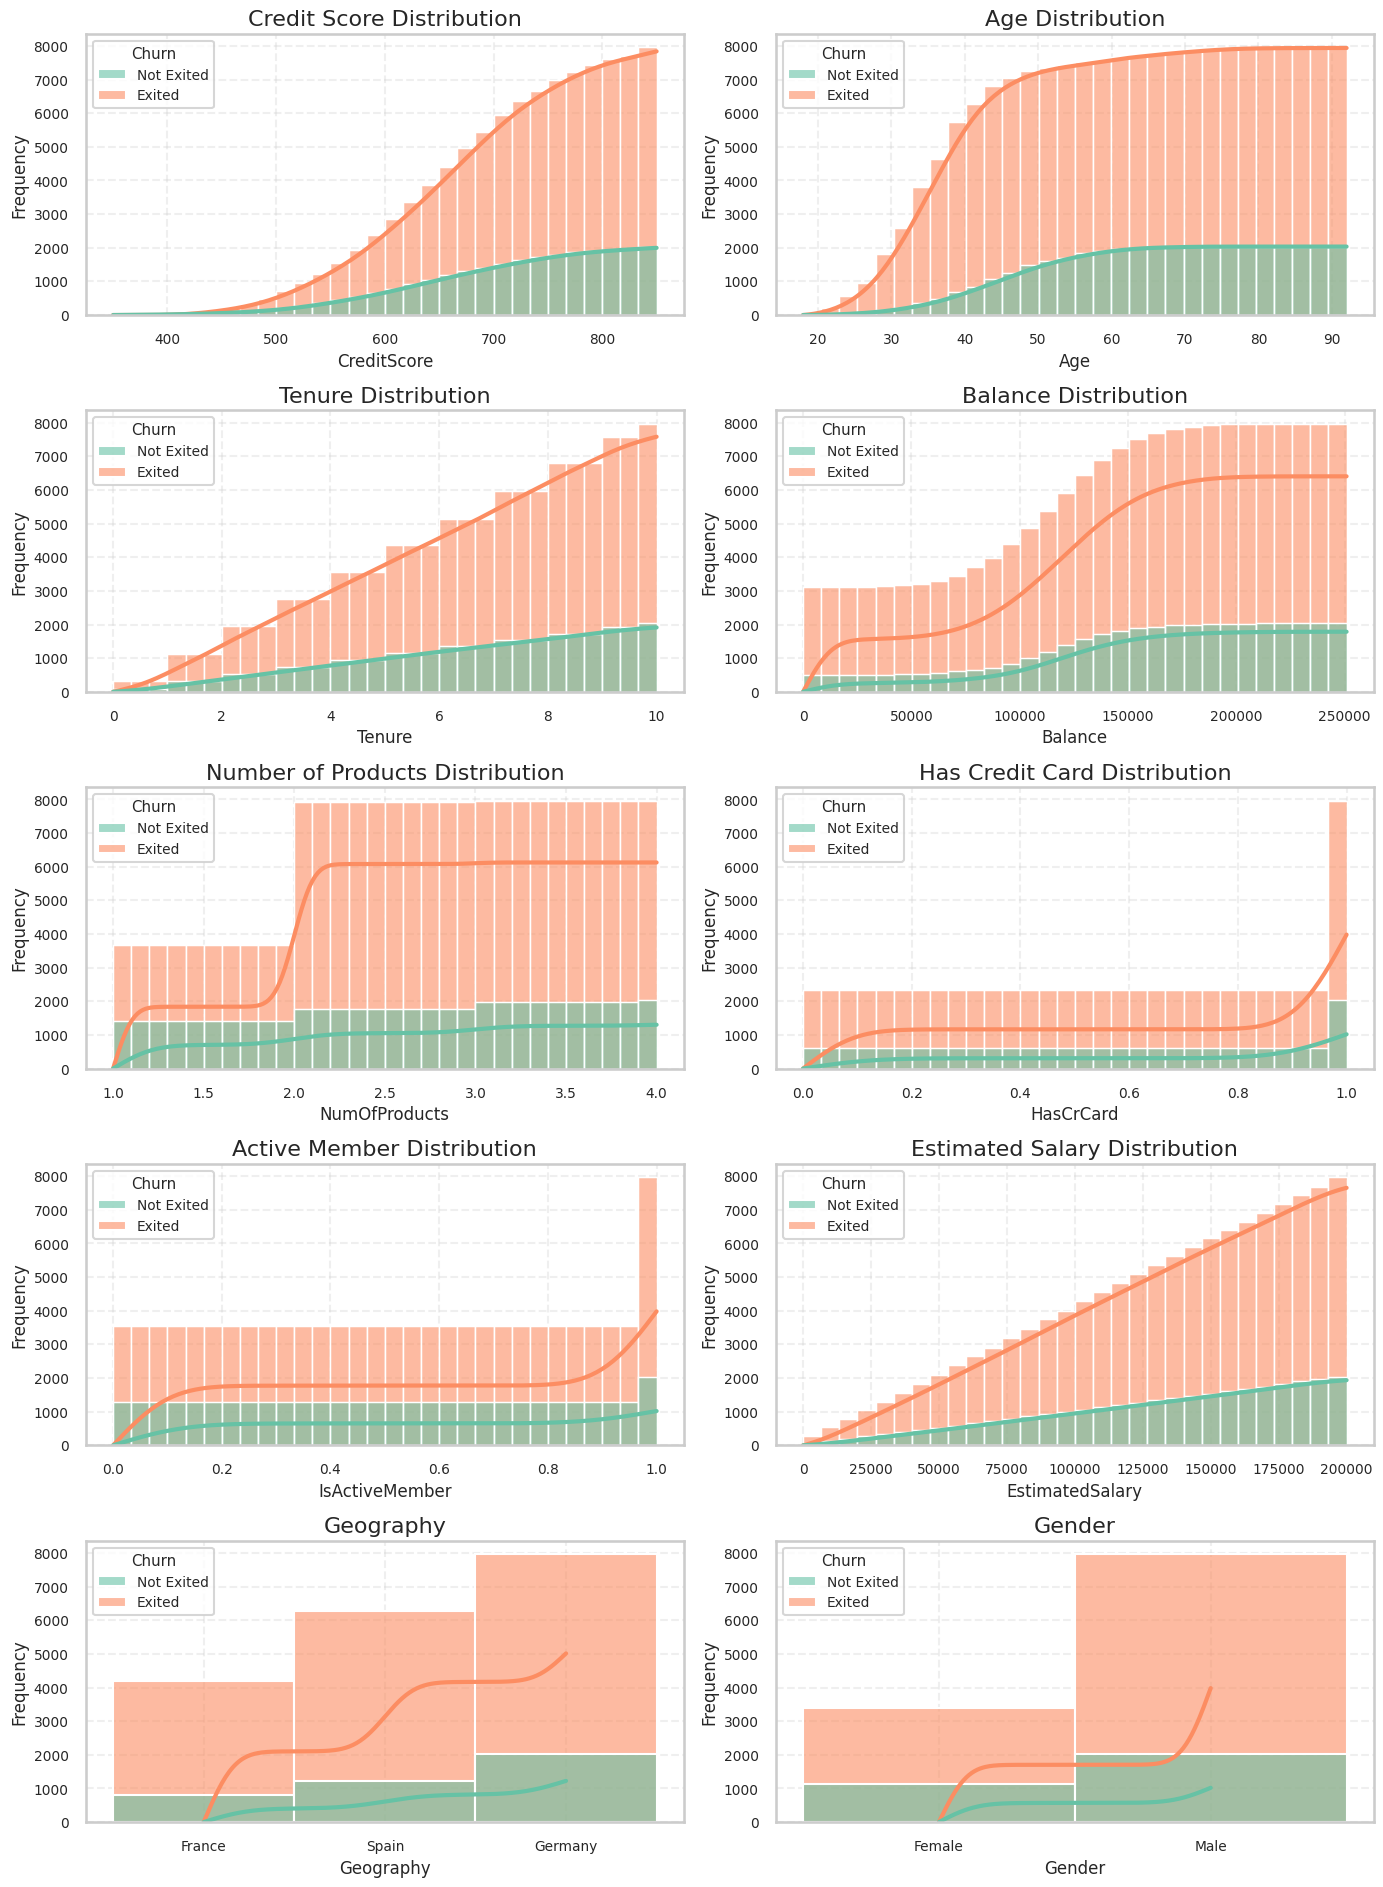

In [ ]:
palette_color = sns.color_palette('Set2')    # Menentukan palet warna yang akan digunakan untuk histogram

# Membuat daftar fitur numerik dan kategorikal yang akan divisualisasikan
vars = ['CreditScore',
        'Age',
        'Tenure',
        'Balance',
        'NumOfProducts',
        'HasCrCard',
        'IsActiveMember',
        'EstimatedSalary',
        'Geography',
        'Gender']
# Menentukan judul untuk setiap histogram yang sesuai dengan fitur terkait
titles = ['Credit Score Distribution',
          'Age Distribution',
          'Tenure Distribution',
          'Balance Distribution',
          'Number of Products Distribution',
          'Has Credit Card Distribution',
          'Active Member Distribution',
          'Estimated Salary Distribution',
          'Geography',
          'Gender']

# Membuat figure dan axes untuk subplot (5 baris x 2 kolom)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14,19))
axes = axes.flatten()   # Membuat fungsi flatten array axes agar lebih mudah diiterasi dalam loop

# Iterasi untuk membuat histogram untuk setiap fitur dalam 'vars'
for i, var in enumerate(vars):
  sns.histplot(data=df_analisis,  # Menggunakan dataset df_analisis
               x=var,            # Menentukan variabel yang diplot
               bins=30,          # Jumlah bin untuk histogram
               hue='Churn',      # Pewarnaan berdasarkan status 'Churn'
               cumulative=True,    # Menampilkan histogram kumulatif
               kde=True,          # Menampilkan estimasi distribusi kernel (KDE)
               multiple='layer',   # Menampilkan distribusi bertumpuk
               line_kws={'lw': 3},  # Menyesuaikan ketebalan garis KDE
               palette=palette_color,        # Menggunakan palet warna yang sudah ditentukan
               alpha=0.6,                # Menyesuaikan transparansi histogram
               ax=axes[i])             # Menggunakan subplot yang sesuai

  axes[i].set_title(titles[i], fontsize=16)      # Menambahkan judul untuk setiap subplot
  axes[i].set_ylabel('Frequency', fontsize=12)    # Menambahkan label sumbu Y
  axes[i].set_xlabel(var, fontsize=12)             # Menambahkan label sumbu X sesuai dengan fitur yang diplot
  axes[i].grid(linestyle='--', alpha=0.3)          # Menambahkan grid dengan garis putus-putus untuk memudahkan pembacaan grafik
# plt.axis('equal')
plt.tight_layout()                              # Menyesuaikan tata letak subplot agar tidak saling tumpang tindih
plt.show()

# Analisis dan Interpretasi:
1. Credit Score Distribution:
  * tidak ada perbedaan yang signifikan antara pelanggan yang churn dan tidak churn berdasarkan credit score.
  * sebagian besar pelanggan memiliki credit score antara 600 - 800, baik yang churn ataupun tidak churn.
  * kesimpulan bahwa credit score bukan faktor utama yang mempengaruhi churn.
2. Age Distribution:
  * pelanggan yang churn cenderung berasal dari kelompok usia yang lebih tua (sekitar 40+ tahun)
  * pelanggan yang lebih muda memiliki tingkat churn yang lebih rendah.
  * kesimpulan bahwa usia lebih tua cenderung mengingkat churn.
3. Tenure Distribution:
  * tidak ada pola yang jelas antara Tenure (lama menjadi pelanggan) dan churn.
  * distribusi churn dan non-churn terlihat hampir merata.
  * kesimpulan bahwa Lama menjadi pelanggan tidak terlalu mempengaruhi churn secara signifikan.
4. Balance Distribution:
  * Pelanggan dengan saldo Balance yang lebih tinggi cenderung lebih banyak yang churn dibandingkan dengan yang memiliki saldo lebih rendah.
  * Namun, ada juga pelanggan dengan saldo nol yang churn, meskipun jumlahnya lebih sedikit.
  * kesimpulan bahwa Pelanggan dengan saldo tinggi lebih berisiko untuk churn.
5. Number of Products Distribution:
  * Pelanggan dengan 1 produk memiliki jumlah churn yang lebih tinggi.
  * Pelanggan dengan 2 produk memiliki churn yang lebih rendah.
  * Pelanggan dengan lebih dari 2 produk memiliki churn yang meningkat kembali.
  * kesimpulan bahwa Pelanggan dengan lebih sedikit produk lebih cenderung churn, tetapi terlalu banyak produk juga bisa meningkatkan risiko churn.
6. Has Credit Card Distribution:
  * Tidak ada perbedaan yang signifikan antara pelanggan yang memiliki kartu kredit dan yang tidak dalam hal churn.
  * kesimpulan bahwa Kepemilikan kartu kredit tidak mempengaruhi churn secara signifikan.
7. Active Member Distribution:
  * Pelanggan yang aktif (IsActiveMember=1) memiliki tingkat churn yang jauh lebih rendah dibandingkan dengan yang tidak aktif.
  * Pelanggan yang tidak aktif memiliki tingkat churn yang jauh lebih tinggi.
  * kesimpulan bahwa Pelanggan yang tidak aktif lebih cenderung churn.
8. Estimated Salary Distribution:
  * Tidak ada pola yang jelas antara Estimated Salary dan churn.
  * Distribusi churn hampir merata di semua tingkat pendapatan.
  * kesimpulan bahwa  Pendapatan bukan faktor utama yang mempengaruhi churn.
9. Geography Distribution:
  * Pelanggan dari Jerman memiliki tingkat churn yang lebih tinggi dibandingkan dengan Spanyol dan Prancis.
  * Spanyol memiliki jumlah pelanggan lebih banyak dibandingkan Jerman, tetapi churn-nya lebih rendah.
  * Prancis memiliki tingkat churn yang paling rendah.
  * kesimpulan bahwa Pelanggan di Jerman lebih berisiko churn, sehingga strategi retention di negara ini perlu diperkuat.
10. Gender Distribution:
  * Pelanggan pria lebih cenderung churn dibandingkan dengan wanita.
  * Jumlah pelanggan pria dan wanita cukup seimbang, tetapi churn lebih dominan pada pria.
  * Kesimpulan bahwa pria lebih berisiko untuk churn dibandingkan pria. Perlu dianalisis lebih lanjut apakah ada faktor eksternal seperti layanan pelanggan atau produk yang kurang sesuai dengan kebutuhan wanita.
11. Kesimpulan Umum:
  * Faktor yang paling berpengaruh terhadap churn:
    * Usia (pelanggan yang lebih tua lebih mungkin churn).
    * Saldo tinggi (pelanggan dengan saldo tinggi lebih cenderung churn).
    * Jumlah produk (pelanggan dengan hanya 1 produk lebih cenderung churn).
    * Keaktifan pelanggan (pelanggan yang tidak aktif lebih cenderung churn).
  * Faktor yang kurang berpengaruh terhadap churn:
    * Credit Score, Tenure, Has Credit Card, dan Estimated Salary tidak menunjukkan pola yang jelas dalam mempengaruhi churn.

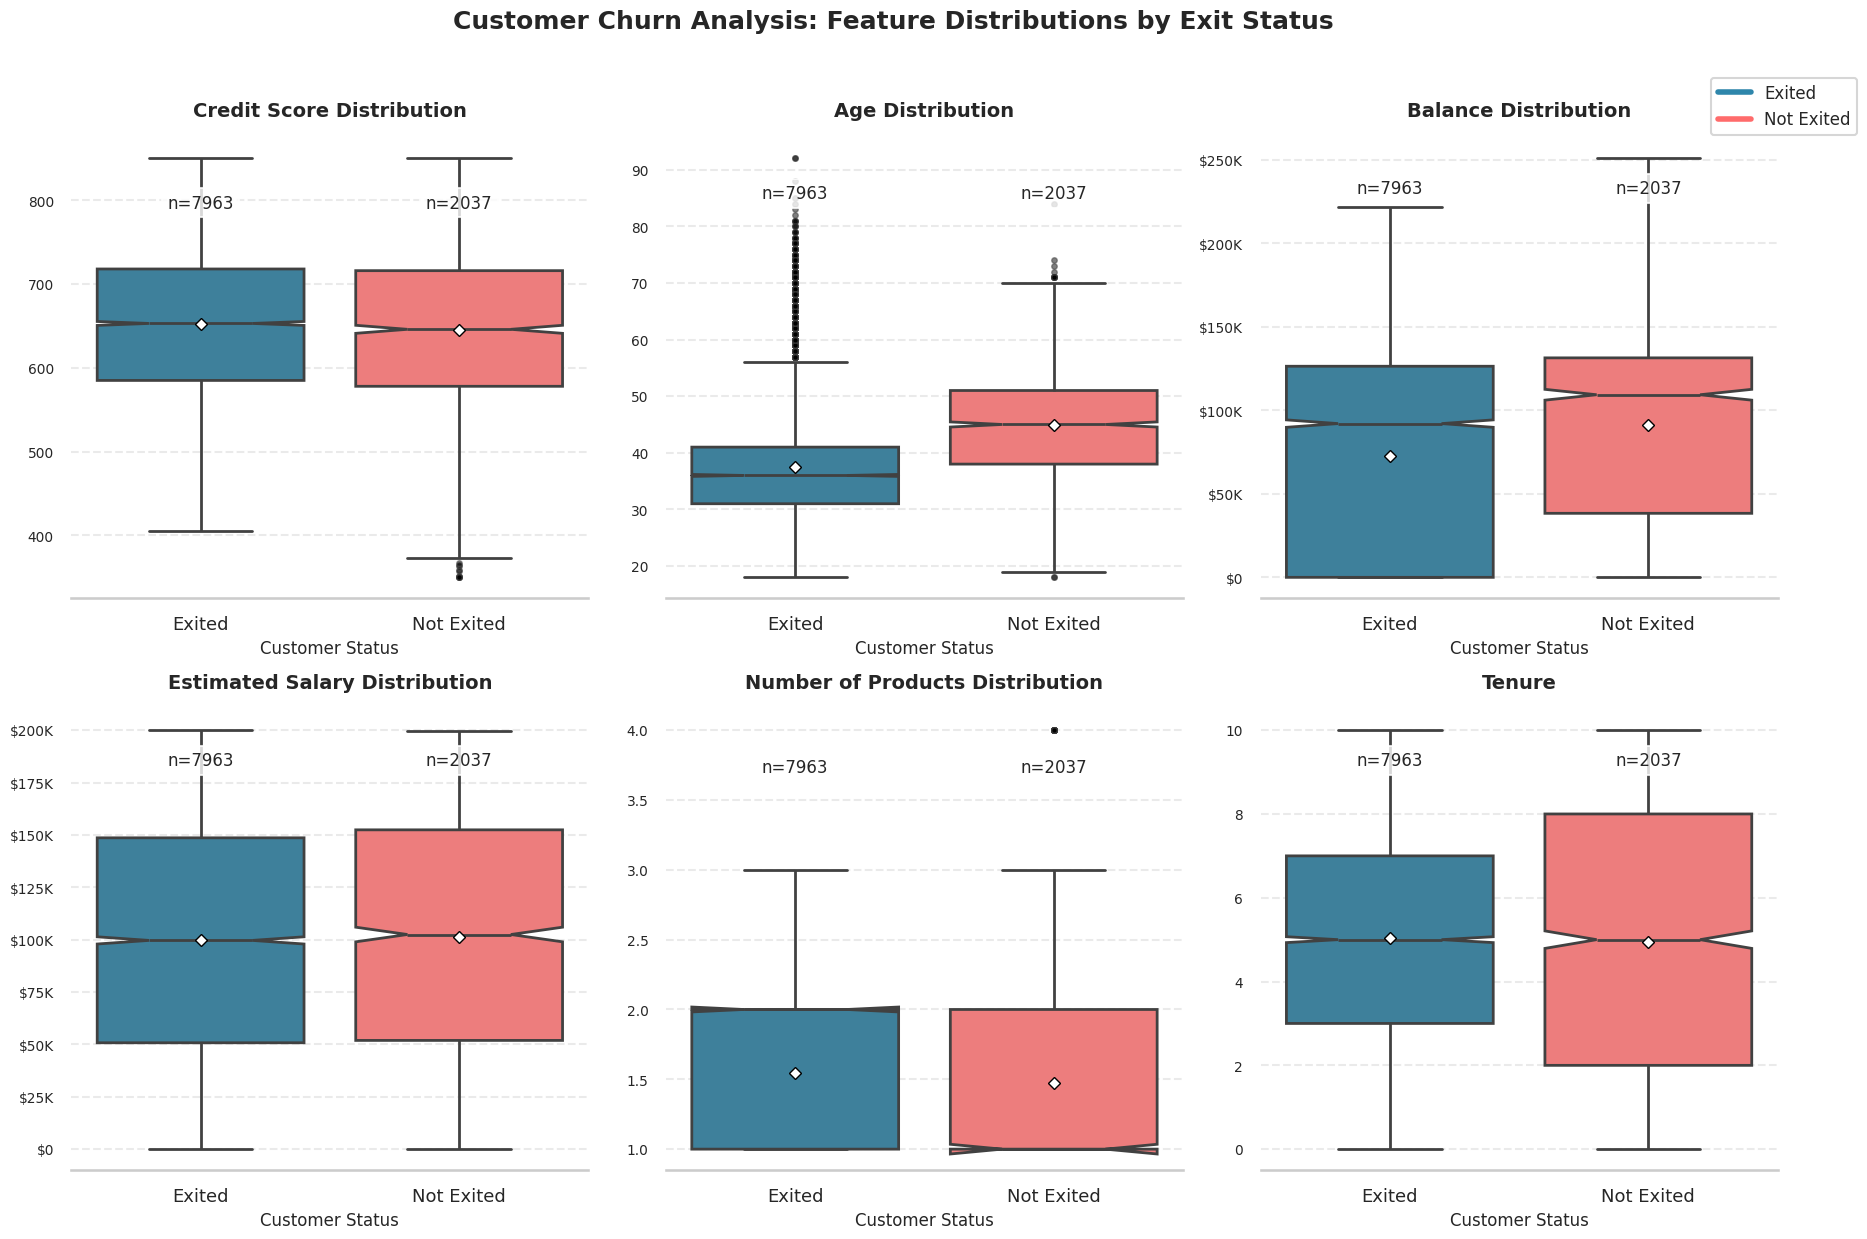

In [ ]:
# Membuat daftar fitur numerik yang akan divisualisasikan
vars = ['CreditScore', 'Age',
        'Balance', 'EstimatedSalary',
        'NumOfProducts', 'Tenure']

# Menentukan judul untuk setiap boxplot sesuai dengan fitur terkait
titles = ['Credit Score Distribution',
          'Age Distribution',
          'Balance Distribution',
          'Estimated Salary Distribution',
          'Number of Products Distribution',
          'Tenure']


palette_color = ["#2E86AB", "#FF6B6B"]          # Menentukan palet warna untuk boxplot (biru dan merah)
fig, ax = plt.subplots(2, 3, figsize=(18, 12))      # Membuat figure dan axes untuk 6 subplot (2 baris x 3 kolom)
plt.subplots_adjust(hspace=0.3, wspace=0.2)             # Mengatur jarak antar subplot


# Fungsi untuk memformat angka besar (misalnya Balance dan EstimatedSalary)
def format_large_numbers(x, pos):
    return f'${x/1000:,.0f}K' if x >= 1000 else f'${x:,.0f}'

# Melakukan iterasi untuk membuat boxplot untuk setiap fitur dalam 'vars'
for i, var in enumerate(vars):
    row, col = divmod(i, 3)          # Menentukan posisi subplot berdasarkan indeks

    # Membuat boxplot dengan berbagai pengaturan visual
    box = sns.boxplot(data=df_analisis,
                      x='Exited',                  # Variabel kategori untuk menentukan warna (Churn atau Tidak)
                      y=var,                  # Variabel numerik yang diplot
                      ax=ax[row, col],            # Menentukan subplot yang digunakan
                      palette=palette_color,         # Menggunakan palet warna yang sudah ditentukan
                      showmeans=True,                # Menampilkan rata-rata dalam plot
                      meanprops={'marker':'D',              # Bentuk marker rata-rata
                                 'markerfacecolor':'white',
                                 'markeredgecolor':'black'},
                      flierprops={'marker':'o',                  # Marker untuk outlier
                                  'markersize':4,
                                  'markerfacecolor':'black',
                                  'alpha':0.5},
                      linewidth=2,                              # Ketebalan garis boxplot
                      notch=True)                             # Menambahkan notch untuk melihat sebaran median


    # Menambahkan anotasi jumlah sampel untuk setiap kategori (Exited 0 atau 1)
    for exit_status in [0, 1]:
      n = len(df_analisis[df_analisis['Exited'] == exit_status])     # Menghitung jumlah sampel
      ax[row, col].text(exit_status,
                        df_analisis[var].max() * 0.95,              # Menempatkan teks di dekat nilai maksimum
                        f'n={n}',                             # Format teks
                        ha='center',
                        va='top',
                        fontsize=12,
                        bbox=dict(facecolor='white',
                                  alpha=0.8))           # Menambahkan latar belakang putih agar terbaca


    # Menambahkan judul untuk setiap subplot
    ax[row, col].set_title(titles[i],
                           fontsize=14,
                           pad=15,
                           fontweight='semibold')


    # Menambahkan label untuk sumbu X (status pelanggan: churn atau tidak)
    ax[row, col].set_xlabel("Customer Status",
                            fontsize=12)

    # Menghapus label sumbu Y agar lebih bersih
    ax[row, col].set_ylabel("")

    # Mengatur label pada sumbu X menggunakan daftar 'type_churn'
    ax[row, col].set_xticklabels(type_churn,
                                 fontsize=13)

    # Menggunakan format khusus untuk fitur keuangan (Balance dan EstimatedSalary)
    if var in ['Balance', 'EstimatedSalary']:
        ax[row, col].yaxis.set_major_formatter(ticker.FuncFormatter(format_large_numbers))

    # Menambahkan garis grid horizontal untuk memudahkan pembacaan grafik
    ax[row, col].yaxis.grid(True,
                            linestyle='--',
                            alpha=0.4)

    # Menghapus garis tepi (spines) dari sumbu kiri untuk tampilan yang lebih bersih
    sns.despine(ax=ax[row, col],
                left=True)

# Menambahkan judul utama untuk seluruh figure
plt.suptitle("Customer Churn Analysis: Feature Distributions by Exit Status",
             fontsize=18,
             fontweight='bold',
             y=1.03)

# Menambahkan legenda untuk warna boxplot
handles = [plt.Line2D([0], [0],
                      color=palette_color[0],
                      lw=4),                             # Warna biru untuk pelanggan yang tidak churn
           plt.Line2D([0], [0],
                      color=palette_color[1],
                      lw=4)]                           # Warna merah untuk pelanggan yang churn
fig.legend(handles,
           type_churn,                                # Label kategori (Churn atau Tidak)
           loc='upper right',
           bbox_to_anchor=(1.04, 0.98),
           fontsize=12,
           frameon=True)

# Menyesuaikan tata letak agar elemen tidak bertabrakan
plt.tight_layout()
plt.show()

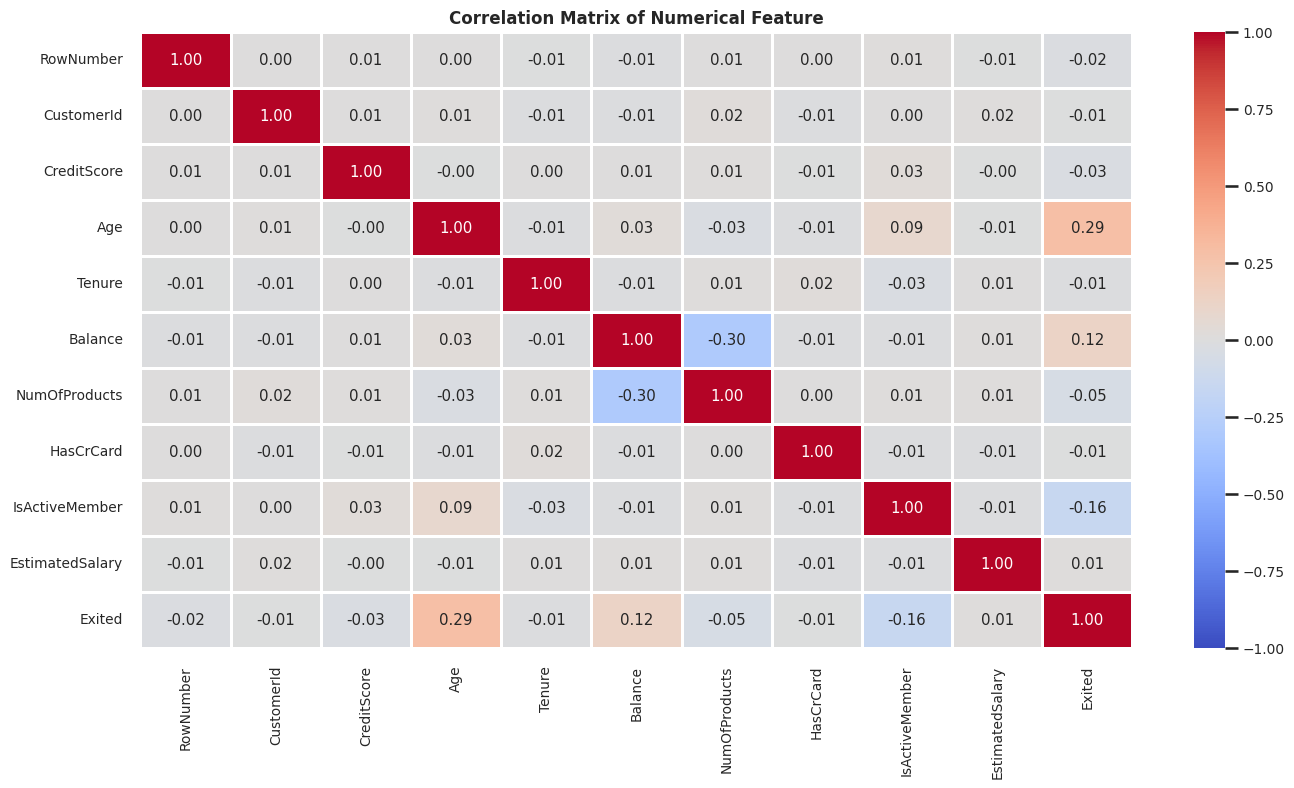

In [ ]:
# Memilih fitur numerik dari dataset (hanya tipe data float64 dan int64)
num_feature = df_analisis.select_dtypes(include=['float64', 'int64'])
# Menghitung matriks korelasi antara fitur numerik
corr = num_feature.corr()
plt.figure(figsize=(16,8))   # Membuat figure dengan ukuran yang lebih besar agar heatmap lebih jelas

# Membuat heatmap korelasi menggunakan Seaborn
sns.heatmap(corr,                     # Data korelasi
            annot=True,                # Menampilkan nilai korelasi dalam setiap sel
            fmt='.2f',                    # Format angka (2 desimal)
            cmap='coolwarm',            # Skema warna (biru untuk negatif, merah untuk positif)
            vmin=-1, vmax=1, lw=2)    # Rentang nilai korelasi (dari -1 hingga 1) & Ketebalan garis pemisah antar sel

# Menambahkan judul dengan ukuran dan ketebalan huruf yang disesuaikan
plt.title('Correlation Matrix of Numerical Feature',
          fontsize=12,
          fontweight='bold')

# Display the plot
plt.show()

In [ ]:
df_analisis.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Churn            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


# Scaling Features

In [ ]:
type_geo

['France', 'Germany', 'Spain']

In [ ]:
type_gender

['Male', 'Female']

In [ ]:
# map() digunakan untuk mengganti nilai dalam kolom dengan angka numerik.
# untuk Mengonversi kolom 'Geography' dari kategori ke nilai numerik. Prancis = 0, Spanyol = 1, Jerman = 2
df_analisis.Geography = df_analisis.Geography.map({'France':0,
                                                   'Spain':1,
                                                   'Germany':2})

# untuk # Mengonversi kolom 'Gender' dari kategori ke nilai numerik. Perempuan = 0, Laki-laki = 1
df_analisis.Gender = df_analisis.Gender.map({'Female':0,
                                             'Male':1})

In [ ]:
df_analisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  Churn            10000 non-null  object 
dtypes: float64(2), int64(9), object(1)
memory usage: 937.6+ KB


In [ ]:
df_analisis.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,Not Exited
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0,Exited
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,Not Exited
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,Exited
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0,Exited


In [ ]:
le = LabelEncoder()      # Menginisialisasi LabelEncoder untuk mengubah nilai kategori menjadi numerik

# Mengubah kolom 'Churn' menjadi bentuk numerik (misalnya: 0 = Churn, 1 = Tidak Churn)
df_analisis['Churn_encoded'] = le.fit_transform(df_analisis['Churn'])

# Menentukan daftar fitur yang akan digunakan sebagai variabel independen (X)
fitur = ['CreditScore', 'Geography',      # Skor kredit dan lokasi geografis pelanggan
         'Gender', 'Age', 'Tenure',       # Jenis kelamin, usia, dan lama berlangganan
         'Balance', 'NumOfProducts',      # Saldo rekening dan jumlah produk yang dimiliki
         'HasCrCard', 'IsActiveMember',   # Status kepemilikan kartu kredit dan status keaktifan
         'EstimatedSalary']               # Perkiraan gaji pelanggan

# Memisahkan fitur (X) dan label target (y)
x = df_analisis[fitur]               # Variabel independen (fitur yang akan digunakan untuk prediksi)
y = df_analisis['Churn_encoded']     # Variabel dependen (label churn yang telah dienkode)

# Handling Class Imbalance: Oversampling and Undersampling or SMOTE Unbalanced propotion of datasests

## Pengenalan Sedikit tentang SMOTE.

saat menangani ketidakseimbangan kelas (class imbalance) dalam dataset, kita sering menggunakan SMOTE. namun, SMOTE saja dapat menambahkan sampel sintesis yang memungkinkan tidak terlalu representatif atau menyebabkan overfitting yang diakibatkan penambahan data sintesis terhadap data original.

untuk menangani itu, biasanya bisa dikombinaksikan dengan SMOTE + Tomek Link atau bisa dengan SMOTE + Edited Nearest Neighbors (ENN).

  * SMOTE + Tomek Links:
    * cara kerja: tambah sample sintesis (SMOTE) --> menghapus pasangan tomek links. Pasangan dari dua sampel yang berbeda kelas tetapi sangat berdekatan dalam ruang fitur. Jika ditemukan, sampel dari kelas mayoritas akan dihapus untuk memperjelas batas kelas.
    * kelebihan: membersihkan batas antara kelas, lebih cepat dibandingkan ENN. membantu untuk mengurangi noise dalam data setelah oversampling.
    * kekurangan: bisa menghapus data yang berguna jika kelas sangat tumpang tindih.
    * cocok digunakan saat: kelas minoritas tumpang tindih dengan kelas mayoritas.


  * SMOTE + ENN:
    * cara kerja: tambah sample sintesis (SMOTE) --> hapus sample mayoritas yang "aneh" menggunakan ENN. Untuk setiap sampel, dilihat k tetangga terdekatnya. Jika mayoritas tetangga memiliki label berbeda, sampel tersebut akan dihapus. Menghilangkan outlier & noise di kelas mayoritas.
    * kelebihan: membersihkan noise, membuat batas kelas lebih jelas. Membantu model mempelajari pola yang lebih jelas.
    * kekurangan: bisa menghapus terlalu banyak data, lebih lambat dibandingkan Tomek.
    * cocok digunakan saat: dataset memiliki banyak outlier atau noise.

In [ ]:
# over_sample = RandomOverSampler(sampling_strategy=0.3)
# under_sample = RandomUnderSampler(sampling_strategy='majority')
# x, y = over_sample.fit_resample(x, y)
# x, y = under_sample.fit_resample(x, y)

In [ ]:
# smote = SMOTE(random_state=42)
# x, y = smote.fit_resample(x, y)

In [ ]:
# # Menggunakan SMOTE + Edited Nearest Neighbors (ENN)
# smote_enn = SMOTEENN(random_state=42)
# x_resampled, y_resampled = smote_enn.fit_resample(x, y)

# Menggunakan SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
x, y = smote_tomek.fit_resample(x, y)

# Data Spliting

In [ ]:
# Membagi dataset menjadi data latih (training) dan data uji (testing)
# test_size=0.25 adalah 25% data digunakan untuk pengujian, 75% untuk pelatihan
# random_state=42 adalah Menjamin hasil split yang sama setiap kali dijalankan
# stratify=y adalah Memastikan proporsi kelas dalam y tetap terjaga dalam training dan testing set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42, stratify=y)


# # Tambahkan polynomial features untuk interaksi non-linear
# # Feature Interaction: berfungsi untuk optimasi model dalam menangkap fitur-fitur dengan pola yang tidak terlihat.
# poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)    # Dengan degree=2, fitur baru yang dibuat adalah hasil perkalian dua

# x_train = poly.fit_transform(x_train)   # Melakukan fitting dan transformasi pada data training
# x_test = poly.transform(x_test)    # Melakukan transformasi pada data testing (menggunakan transformasi yang telah dipelajari dari training set)

# Print the shape (number of samples and features) of the training and testing sets
print('Shape of x_train:', x_train.shape)  # Ukuran data latih (fitur)
print('-' * 60)
# print('\n')
print('Shape of x_test:', x_test.shape)    # Ukuran data uji (fitur)
print('-' * 60)
# print('\n')
print('Shape of y_train:', y_train.shape)  # Ukuran data latih (label)
print('-' * 60)
# print('\n')
print('Shape of y_test:', y_test.shape)    # Ukuran data uji (label)

Shape of x_train: (10333, 10)
------------------------------------------------------------
Shape of x_test: (3445, 10)
------------------------------------------------------------
Shape of y_train: (10333,)
------------------------------------------------------------
Shape of y_test: (3445,)


# Build & Development Model with Machine Learning dan Fine-tuning models

## Ensemble Learning: CatBoosting, & Fine-tuning Model: Bayesian Optimazition & StratifiedKFold

In [ ]:
# Menginisialisasi model CatBoost dengan nilai random_state untuk hasil yang konsisten
cb = CatBoostClassifier(random_state=42)
# Menentukan ruang pencarian hyperparameter untuk optimasi Bayesian
cb_param_space = {'iterations': Integer(300, 850),                   # Jumlah iterasi (tree boosting)
                  'depth': Integer(1, 3),                            # Kedalaman pohon keputusan
                  'learning_rate': [0.03, 0.05],                     # Laju pembelajaran (learning rate)
                  'l2_leaf_reg': Integer(2, 10),                      # Regularisasi L2 untuk menghindari overfitting
                  'subsample': Real(0.8, 1.0),                       # Rasio sampel yang digunakan dalam boosting
                  'eval_metric': ['Accuracy'],                       # Metrik evaluasi yang digunakan
                  'random_strength': Integer(2, 10),                  # Pengacakan tambahan untuk meningkatkan generalisasi
                  'grow_policy': ['SymmetricTree', 'Depthwise'],     # Metode pertumbuhan pohon
                  'border_count': Integer(16, 128)}                  # Jumlah batas diskretisasi untuk fitur numerik

# Menggunakan Stratified K-Fold Cross Validation dengan 5 fold untuk menjaga proporsi kelas
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Melakukan pencarian hyperparameter menggunakan Bayesian Optimization
cb_bayes_search = BayesSearchCV(cb, cb_param_space,
                                cv=cv, scoring='accuracy',   # Cross-validation dengan StratifiedKFold
                                n_iter=34, n_jobs=-1,        # Skor evaluasi berdasarkan akurasi dan Jumlah iterasi pencarian hyperparameter
                                verbose=True, random_state=42)  # Menggunakan semua core yang tersedia untuk kecepatan dan Konsistensi hasil pencarian

cb_bayes_search.fit(x_train, y_train)     # Melatih model dengan dataset training menggunakan hyperparameter terbaik

# Mengambil hyperparameter terbaik dari hasil pencarian
cb_best_params = cb_bayes_search.best_params_
print('Parameter Terbaik (CatBoost Model):', cb_best_params)
print('-'*286)

# Menggunakan model dengan hyperparameter terbaik untuk prediksi
cb_best_model = cb_bayes_search.best_estimator_       # Model CatBoost terbaik
cb_y_test_prediction = cb_best_model.predict(x_test)   # Prediksi data uji
cb_y_train_prediction = cb_best_model.predict(x_train)  # Prediksi data latih


# Menghitung dan mencetak akurasi model pada data uji dan data latih
print('Accuracy Testing Model CatBoost Score:', accuracy_score(y_test, cb_y_test_prediction))
print('Accuracy Training Model CatBoost Score:', accuracy_score(y_train, cb_y_train_prediction))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

## Optimasi Metric & Evaluation Model Performance

In [ ]:
# Melatih model CatBoost dengan parameter terbaik dari hasil optimasi Bayesian
final_model_cb = CatBoostClassifier(**cb_best_params)

# Melatih model menggunakan dataset training
final_model_cb.fit(x_train, y_train,
                   eval_set=(x_test, y_test),    # Gunakan data uji untuk evaluasi selama training
                   early_stopping_rounds=50,     # Hentikan training jika tidak ada peningkatan dalam 50 iterasi
                   verbose=True)                 # Menampilkan output progres training

# Melakukan prediksi pada dataset uji menggunakan model yang telah dilatih
cb_y_pred_final = final_model_cb.predict(x_test)         # Prediksi kelas (0 atau 1)
cb_y_prob_final = final_model_cb.predict_proba(x_test)   # Probabilitas prediksi untuk setiap kelas

0:	learn: 0.7613471	test: 0.7564586	best: 0.7564586 (0)	total: 3.46ms	remaining: 2.86s
1:	learn: 0.7589277	test: 0.7515239	best: 0.7564586 (0)	total: 7.05ms	remaining: 2.92s
2:	learn: 0.7366689	test: 0.7277213	best: 0.7564586 (0)	total: 10.2ms	remaining: 2.8s
3:	learn: 0.7595084	test: 0.7515239	best: 0.7564586 (0)	total: 13.4ms	remaining: 2.77s
4:	learn: 0.7754766	test: 0.7642961	best: 0.7642961 (4)	total: 16.7ms	remaining: 2.75s
5:	learn: 0.7844769	test: 0.7718433	best: 0.7718433 (5)	total: 20ms	remaining: 2.75s
6:	learn: 0.7860254	test: 0.7735849	best: 0.7735849 (6)	total: 23.2ms	remaining: 2.72s
7:	learn: 0.7995742	test: 0.7857765	best: 0.7857765 (7)	total: 26.5ms	remaining: 2.72s
8:	learn: 0.7970580	test: 0.7851959	best: 0.7857765 (7)	total: 29.8ms	remaining: 2.71s
9:	learn: 0.7979290	test: 0.7846154	best: 0.7857765 (7)	total: 33.2ms	remaining: 2.72s
10:	learn: 0.7997677	test: 0.7878084	best: 0.7878084 (10)	total: 36.7ms	remaining: 2.73s
11:	learn: 0.7995742	test: 0.7869376	best: 0

## Classification Report, ROC_AUC, Confusion Matrix

Model: Model CatBoost (CatBoost Tuned)
              precision    recall  f1-score   support

      Exited       0.82      0.83      0.82      1723
  Not Exited       0.82      0.82      0.82      1722

    accuracy                           0.82      3445
   macro avg       0.82      0.82      0.82      3445
weighted avg       0.82      0.82      0.82      3445

----------------------------------------------------------------------------------------------------
ROC_AUC Score: 0.8997
----------------------------------------------------------------------------------------------------




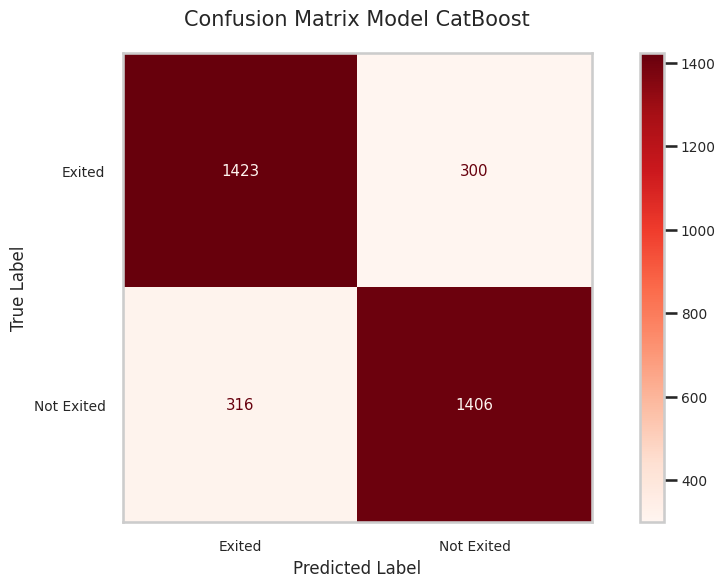

In [ ]:
def evaluate_tuned_model(y_test, prediction, probabilities, model_name):
  # Normalisasi probabilitas untuk setiap kelas
  unik_kelas = np.unique(y_test)  # Mendapatkan daftar unik dari label kelas yang ada dalam y_test

  # Memastikan target_names sesuai dengan kelas unik dalam y_test
  target_names = le.classes_[unik_kelas]

  # Menghasilkan classification report untuk evaluasi model
  report = classification_report(y_test, prediction, target_names=target_names)
  probabilities_filtered = probabilities[:, unik_kelas]  # Memfilter probabilitas hanya untuk kelas yang ada dalam y_test

  # ROC_AUC Score
  roc_auc = roc_auc_score(y_test, probabilities[:, 1])  # Menghitung ROC_AUC Score untuk mengevaluasi performa model pada klasifikasi biner

  # Print model evaluation results
  print(f'Model: {model_name} (CatBoost Tuned)')    # Menampilkan nama model yang dievaluasi
  print(report)   # Menampilkan classification report
  print('-'* 100)
  print(f'ROC_AUC Score: {roc_auc:.4f}')   # Menampilkan skor ROC_AUC
  print('-'*100)

  # Confusion Matrix
  cm = confusion_matrix(y_test, prediction)   # Menghitung confusion matrix untuk mengevaluasi prediksi model
  display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)   # Menampilkan confusion matrix dalam bentuk visualisasi
  fig, ax = plt.subplots(figsize=(10,6))   # Membuat figure dan axes dengan ukuran tertentu
  display.plot(cmap='Reds',     # Menggunakan colormap 'Reds' untuk visualisasi
               ax=ax,    # Menggunakan axes yang sudah dibuat
               colorbar=True,    # Menampilkan colorbar
               values_format='d')  # Menampilkan nilai dalam format integer
  ax.grid(False)    # Menghilangkan grid pada plot
  plt.title(f'Confusion Matrix {model_name}', fontsize=15, pad=20)  # Menambahkan judul plot
  plt.xlabel('Predicted Label', fontsize=12)   # Menambahkan label sumbu X
  plt.ylabel('True Label', fontsize=12)    # Menambahkan label sumbu Y
  plt.tight_layout()   # Menyesuaikan tata letak agar tidak bertumpuk
  return roc_auc    # Mengembalikan nilai ROC_AUC Score


# Evaluasi model yang telah dituning dengan memanggil fungsi evaluate_tuned_model
evaluate_tuned_model(y_test, cb_y_pred_final, cb_y_prob_final, 'Model CatBoost')
print('\n')   # Menambahkan newline untuk tampilan lebih rapi

# Build & Development Model with Deep Neural Network (DNN)

## Features Scaling:


* Robust Scaler:
  * **RobustScaler** digunakan untuk menangani data dengan outlier karena melakukan scaling berdasarkan interquartile range (IQR).
  * Tidak seperti StandardScaler (yang menggunakan mean dan standard deviation), RobustScaler menggunakan median dan IQR untuk menormalkan data, sehingga lebih tahan terhadap outlier.

* Standard Scaler:
  * **StandardScaler** digunakan untuk menstandarisasi fitur dengan mean = 0 dan standard deviation = 1.
  * Normalisasi ini membuat setiap fitur memiliki skala yang sebanding, yang membantu model machine learning bekerja lebih optimal.

In [ ]:
# # Inisialisasi RobustScaler untuk normalisasi data
# scaler = RobustScaler()

# x_train = scaler.fit_transform(x_train)    # Melakukan fitting dan transformasi pada data training
# # Melakukan transformasi pada data testing (menggunakan scaler yang telah difit dari data training)
# x_test = scaler.transform(x_test)

In [ ]:
# Inisialisasi StandardScaler untuk normalisasi data
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)    # Melakukan fitting dan transformasi pada data training
# Melakukan transformasi pada data testing (menggunakan scaler yang telah difit dari data training)
x_test = scaler.transform(x_test)

## Build & Development Model Deep Neural Network

## Rekomendasi Activation untuk Layer awal:
  1. Default yaitu **ReLU**: tetap menjadi pilihan terbaik untuk activation layer pertama karena sederhana dan efisien.
  2. **Leaky ReLU:**
    * kelebihan:
      * mengatasi masalah **dying ReLU** (neuron mati karena output 0 untuk input negatif).
      * Memberikan gradien kecil untuk input negatif, sehingga neuron tetap "hidup".
    * kekurangan:
      * Parameter **alpha** perlu diatur (biasanya tetap).
  3. **Parametric ReLU (PReLU):**
    * kelebihan:
      * Fleksibel karena **alpha** disesuaikan otomatis untuk setiap layer.
      * Sama dengan Leaky ReLU, tetapi **alpha** dijadikan parameter yang dilatih (bukan tetap).
    * kekurangan:
      * Lebih kompleks karena menambah parameter yang perlu dilatih.
  4. **ELU (Exponential Linear Unit):**
    * kelebihan:
      * Output negatif memiliki gradien yang lebih besar (berbentuk eksponensial), mengurangi vanishing gradients.
      * Output rata-rata mendekati 0, membantu stabilitas training.
    * kekurangan:
      * Lebih komputasi dibanding ReLU karena eksponensial.
  5. **Swish (SiLU):**
    * kelebihan:
      * Smooth (tidak tajam seperti ReLU), cocok untuk optimasi.
      * Performa lebih baik pada model dengan parameter besar (misal: CNN untuk gambar).
    * kekurangan:
      * Lebih lambat komputasi karena melibatkan fungsi sigmoid.
  6. **SELU (Scaled Exponential Linear Unit):**
    * kelebihan:
      * Self-normalizing : Mempertahankan rata-rata output mendekati 0 dan varians 1, sehingga mengurangi kebutuhan Batch Normalization .
      * Stabil dalam training untuk jaringan sangat dalam.
    * kekurangan:
      * Memerlukan parameter **lambda** dan **alpha** yang spesifik.
  7. **GELU (Gaussian Error Linear Unit):**
    * kelebihan:
      * Performa lebih baik pada model Transformer (misal: BERT, GPT).
      * Smooth dan kontinu, cocok untuk optimasi.
      * Mempertahankan aktivasi positif dan negatif.
    * kekurangan:
      * Komputasi lebih berat karena melibatkan fungsi Gaussian.
  8. **Thresholded ReLU:**
    * kelebihan:
      * Mempertahankan sifat linear untuk input besar.
      * Bisa mengurangi sensitivitas terhadap noise.
    * kekurangan:
      * Rentan terhadap neuron mati jika **theta** terlalu besar.
  9. **Mish:**
    * kelebihan:
      * Non-Monotonic : Dapat menghasilkan output yang non-monotonic, yang dapat membantu model belajar representasi yang lebih kompleks.
      * Smoothness : Lebih smooth daripada ReLU, membantu mengurangi vanishing gradient problem.
      * Performa Baik : Telah terbukti memberikan performa yang baik pada beberapa benchmark.
    * kekurangan:
      * Komputasional Lebih Mahal : Sedikit lebih mahal dari ReLU.
  10. **Softplus:**
    * kelebihan:
        * Smoothness : Lebih smooth daripada ReLU, membantu mengurangi vanishing gradient problem.
        * Output Positif : Selalu menghasilkan output positif.
    * kekurangan:
        * Komputasional Lebih Mahal : Sedikit lebih mahal dari ReLU.




## Rekomendasi Optimizer:
  1. **Adam (Adaptive Moment Estimation):**
    * kekuatan:
      * menggabungkan **momentum (seperti SGD)** dan **adaptive learning rate (sepeti RMSProp)**.
      * cepat konvergen, stabil, dan cocok untuk sebagian besar khasus.
      * menangani gradien sparse atau noisy dengan baik.
      * cocok digunakan untuk sebagian besar arsitektur (CNN, Transformer, MLP).
      * mampu juga untuk digunakan dalam data besar dan kompleks misalnya: gambar atau teks.
  2. **SGD with Momentum (Stochastic Gradient Descent + Momentum):**
    * kekuatan:
      * momentum membantu mempercepat pelatihan dan menghindari osilasi gradient.
      * lebih baik dalam generalisasi untuk beberapa khasus misalnya model sederhana atau dataset yang kecil.
      * digunakan untuk membuat atsitektur yang membutuhkan presisi tinggi misalnya ResNet di ImageNet.
      * mampu dalam menghindari overfitting karena konvergensi yang lebih halus.
  3. **RMSProp:**
    * kekuatan:
      * adaptive learning rate dengan **moving average gradient kuadrat.**
      * menghindari masalah learning rate yang terlalu kecil seperti AdaGrad.
      * bisa digunakan dalam arsitektur seperti LSTM atau RNN (karena cocok untuk gradien yang tidak stabil)
      * Dataset non-stasioner yang mana distribusi data berubah.
  4. **AdamW:**
    * kekuatan:
      * versi Adam dengan **Decoupled Weight Decay** (memisahkan regulasi L2 dari update parameter).
      * lebih stabil untuk model besar seperti Transformer, ViT.
      * mampu digunakan dalam model dengan regulasi yang ketat misalnya pada transfer learning.
      * mampu diterapkan dalam arsitektur modern seperti BERT, GPT, atau Vision Transformer.
  5. **Nadam (Nesterov-accelerated Adam):**
    * kekuatan:
      * menggabungkan **Nesterov momentum** ke dalam Adam.
      * konvergensi lebih cepat dan akurat dibandingkan Adam standar.
      * mampu digunakan saat Noise tinggi.
      * khasus dimana Adam kurang presisi.
  6. **Lion (Evolved Sign Momentum):**
    * kekuatan:
      * kekuatan:
        * optimizer baru dari google di tahun 2023 yang mampu menggunakan **operator sign** untuk update parameter.
        * digunakan dalam parameter sangat banyak seperti LLM seperti PaLM.
        * pelatihan dengan resources terbatas.
  7. **AdaBelief:**
    * kekuatan:
      * memperbaiki Adam dengan mempertimbangkan **kepercayaan terhadap gradien (belief)**.
      * stabil untuk gradien noisy atau ketidak konsistenan.
      * digunakan untuk dataset dengan outlier atau noise tinggi.
      * bisa digunakan dalam GAN atau RL.
  8. **Adafactor:**
    * kekuatan:
      * **menghemat memori** dengan menghindari penyimpanan matrik yang besar (cocok untuk model dengan parameter sangat banyak, seperti Transformer).
      * menggunakan **factorized second-moment estimation**.
      * bisa digunakan dalam LLMs seperti T5, GPT-3.
  9. **Yogi:**
    * kekuatan:
      * merupakan vaiasi Adam yang memperbaiki adaptasi learning dengan **mengontrol akumulasi gradient kuadrat.**
      * lebih stabil untuk data noisy atau sparse.
      * digunakan dalam dataset dengan gradient tidak stabil.

  

In [ ]:
# Inisialisasi model Neural Network
nn = Sequential()

# 6 Hidden Layers: Model cukup dalam untuk menangkap pola kompleks dalam data.
# Swish Activation: Lebih unggul dibandingkan ReLU dalam beberapa kasus, terutama untuk jaringan yang lebih dalam.
# Batch Normalization: Membantu stabilisasi distribusi input di setiap layer, mempercepat pelatihan.
# Dropout: Digunakan untuk mengurangi overfitting dengan mengabaikan sebagian neuron selama pelatihan.
# Regularisasi L2: Diterapkan di hidden layer kedua untuk mengurangi kompleksitas model.
# Adamax adalah varian dari Adam yang lebih stabil untuk dataset dengan skala besar dan fitur yang sangat beragam.
# Learning Rate 0.001: Standar awal yang umum untuk Adamax.
# Learning rate 0.0005: Bisa diuji dengan ReduceLROnPlateau apakah perlu diturunkan lebih lanjut selama pelatihan.
# validation_split=0.2: Menggunakan 20% data training untuk validasi selama pelatihan.
# epochs=100: Jumlah iterasi pelatihan. Bisa disesuaikan dengan early stopping jika diperlukan.
# batch_size=32: Standar umum, bisa dicoba 64 atau 128 untuk eksperimen performa.
# Early Stopping (patience=10): Jika model butuh lebih banyak epoch untuk konvergen, bisa dicoba patience=15.
# ReduceLROnPlateau (patience=5, factor=0.5): Bisa mengurangi learning rate terlalu cepat. Mungkin factor=0.7 agar lebih bertahap.


# Define Layer input + hidden Layer pertama
nn.add(Dense(units=64, kernel_initializer='he_normal', input_dim=x_train.shape[1]))   # 64 neuron, inisialisasi He
nn.add(BatchNormalization())                                      # Normalisasi batch untuk stabilitas pelatihan
nn.add(tf.keras.layers.Activation('swish'))                       # Aktivasi Swish untuk non-linearitas yang lebih baik
nn.add(Dropout(rate=0.3))                               # Dropout untuk mengurangi overfitting (30%)

# Hiden Layer Kedua
nn.add(Dense(units=32, kernel_initializer='he_normal', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.0003, l2=0.001)))
nn.add(BatchNormalization())
nn.add(tf.keras.layers.Activation('swish'))
nn.add(Dropout(rate=0.25))                        # Dropout 25%

# Hiden Layer ketiga
nn.add(Dense(units=16, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(tf.keras.layers.Activation('swish'))
nn.add(Dropout(rate=0.25))                     # Dropout 25%

# Hiden Layer keempat
nn.add(Dense(units=10, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(tf.keras.layers.Activation('swish'))
nn.add(Dropout(rate=0.2))                     # Dropout 20%

# Hiden Layer kelima
nn.add(Dense(units=4, kernel_initializer='he_normal'))
nn.add(BatchNormalization())
nn.add(tf.keras.layers.Activation('swish'))
nn.add(Dropout(rate=0.1))                     # Dropout 10%


# Output Layer
nn.add(Dense(units=1, activation='sigmoid'))       # Menggunakan sigmoid untuk binary classification

# Optimizer RMSprop cocok untuk masalah dengan gradien yang berfluktuasi atau sparse.
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.000215, rho=0.87, epsilon=1e-07)

# Kompilasi model dengan loss binary crossentropy dan metrik evaluasi
nn.compile(optimizer=optimizer,           # Adam, Nadam, SGD, RMSprop, AdamW, Adamax, AdaBelief.
           loss='binary_crossentropy',    # Binary classification loss
           metrics=['accuracy',
                    tf.keras.metrics.Precision(name='precision'),
                    tf.keras.metrics.Recall(name='recall')])

nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             170 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              44 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4)                   │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 4)                   │              

 Total params: 4,035 (15.76 KB)

 Trainable params: 3,783 (14.78 KB)

 Non-trainable params: 252 (1008.00 B)

In [ ]:
# Callback untuk menghentikan pelatihan lebih awal jika tidak ada peningkatan
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.8,
                              patience=10,
                              min_lr=0.00001)

nn_history = nn.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=150, batch_size=32,
                    verbose=True, callbacks=[early_stopping, reduce_lr])

Epoch 1/150
323/323 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5218 - loss: 0.8868 - precision: 0.5182 - recall: 0.6060 - val_accuracy: 0.6708 - val_loss: 0.7931 - val_precision: 0.6424 - val_recall: 0.7700 - learning_rate: 2.1500e-04
Epoch 2/150
323/323 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6003 - loss: 0.8165 - precision: 0.5939 - recall: 0.6486 - val_accuracy: 0.7457 - val_loss: 0.7443 - val_precision: 0.7448 - val_recall: 0.7474 - learning_rate: 2.1500e-04
Epoch 3/150
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6776 - loss: 0.7665 - precision: 0.6754 - recall: 0.6871 - val_accuracy: 0.7663 - val_loss: 0.6941 - val_precision: 0.7850 - val_recall: 0.7334 - learning_rate: 2.1500e-04
Epoch 4/150
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7210 - loss: 0.7083 - precision: 0.7327 - recall: 0.7010 - val_accuracy: 0.7747 - val_loss: 0.6534 - val_precision: 0.8040 - val_recall: 0.7265 - learning_rate: 2.1500e-04
Epoch 5/150
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s

In [ ]:
loss, accuracy, precision, recall, = nn.evaluate(x_test, y_test)
print(f'Test Accuracy Deep Neural Network Model (DNN): {accuracy*100:.1f}%')

108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8223 - loss: 0.4139 - precision: 0.8192 - recall: 0.8115
Test Accuracy Deep Neural Network Model (DNN): 81.2%


## Evaluation Model Performance

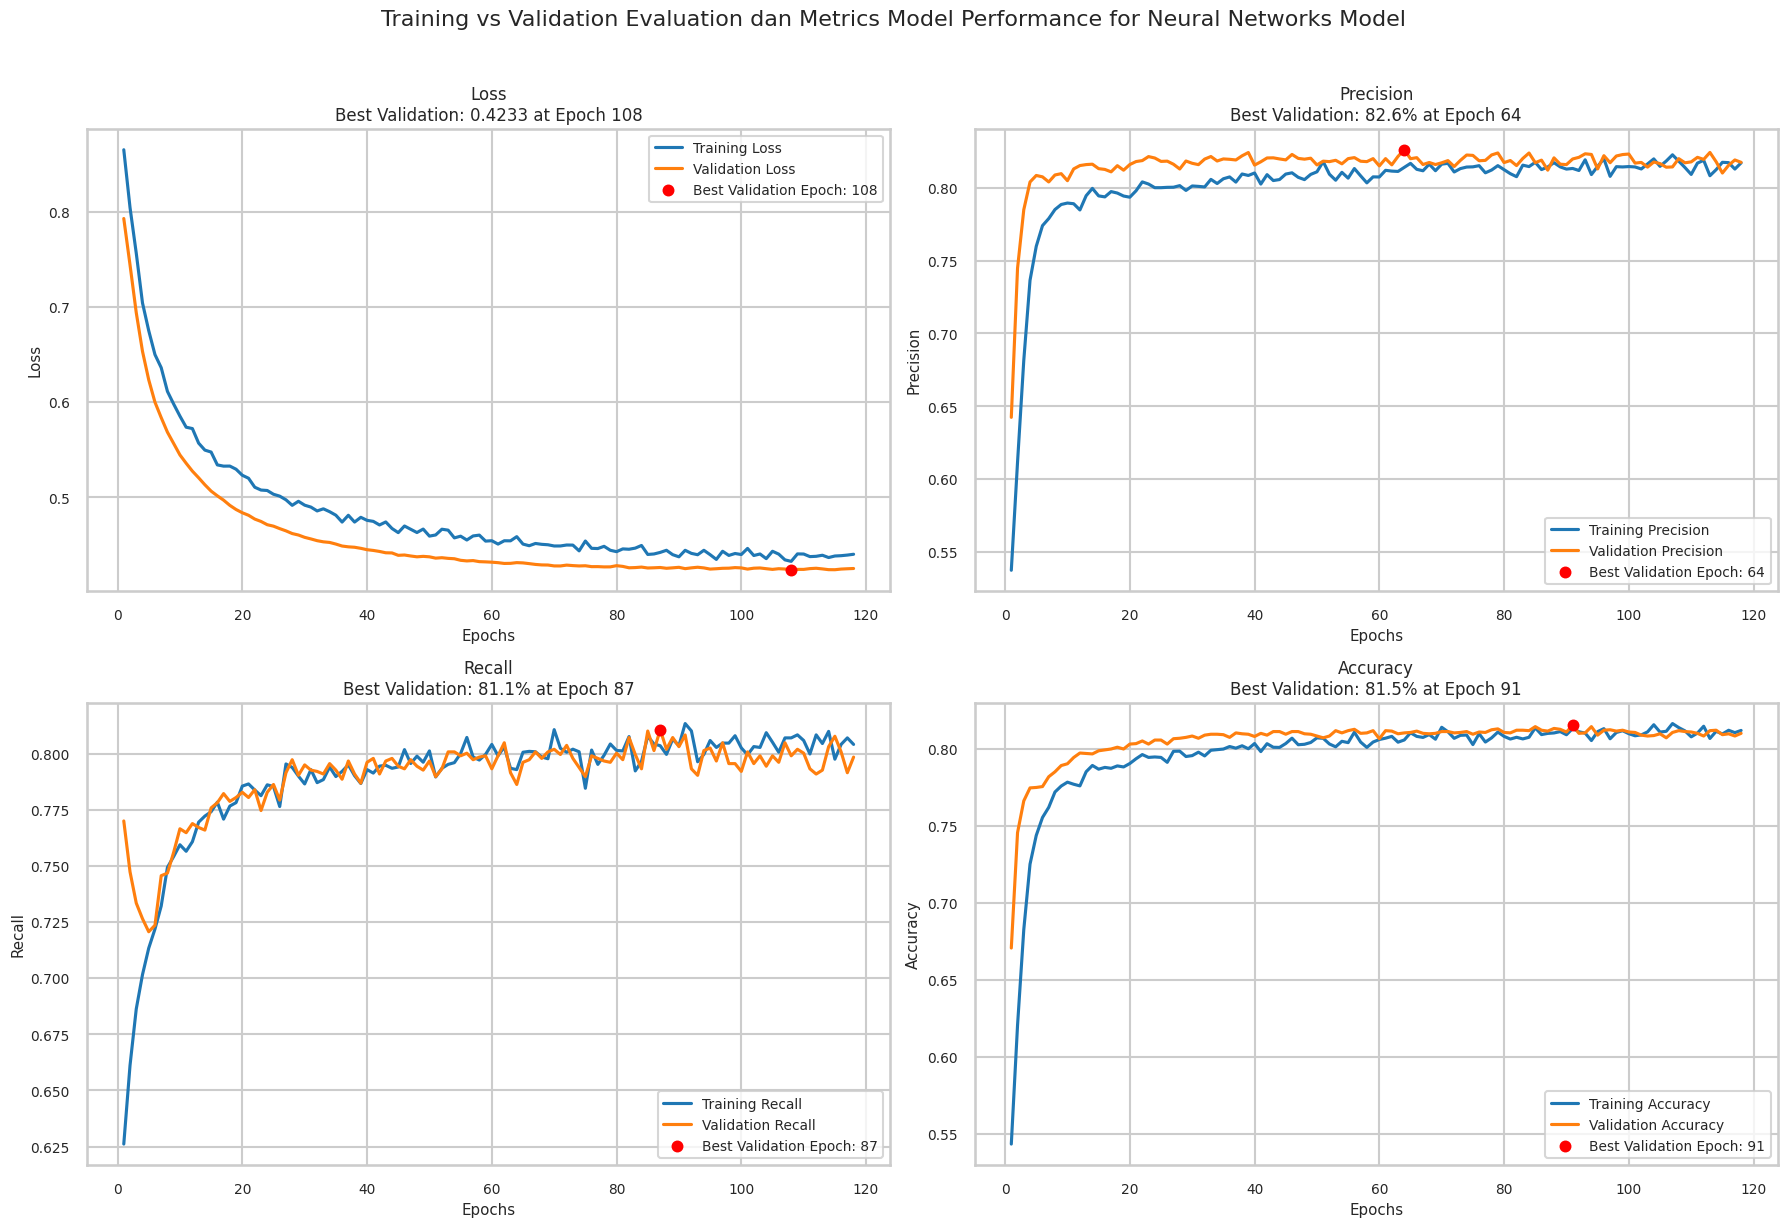

In [ ]:
# Membuat subplot dengan 2 baris dan 2 kolom serta mengatur ukuran gambar
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
# Menambahkan judul utama pada figure dengan posisi sedikit di atas (y=1.02)
fig.suptitle('Training vs Validation Evaluation dan Metrics Model Performance for Neural Networks Model', fontsize=16, y=1.02)

# Membuat daftar metrik yang akan diplot, setiap tuple berisi:
# (nama metrik dalam history model, judul untuk plot, format angka untuk ditampilkan)
metrics = [('loss', 'Loss', None),
           ('precision', 'Precision', '.1%'),
           ('recall', 'Recall', '.1%'),
           ('accuracy', 'Accuracy', '.1%')]

# Melakukan looping untuk setiap subplot dan metrik yang ingin diplot
for ax, (metric, title, fmt) in zip(axes.flatten(), metrics):
  # Mengambil nilai metrik dari hasil pelatihan model (history)
  train_metric = nn_history.history[metric]   # Data dari training
  val_metric = nn_history.history[f'val_{metric}']  # Data dari validation
  epochs = range(1, len(train_metric) + 1)  # Membuat daftar epoch

  # Membuat plot menggunakan seaborn untuk menampilkan garis metrik training dan validation
  sns.lineplot(x=epochs,
               y=train_metric,
               label=f'Training {title}', ax=ax)
  sns.lineplot(x=epochs,
               y=val_metric,
               label=f'Validation {title}', ax=ax)

  # Menentukan epoch terbaik berdasarkan validation metric
  if metric == 'loss':
    best_val_epoch = np.argmin(val_metric) + 1    # Mencari epoch dengan nilai loss terendah
    best_val_value = np.min(val_metric)   # Nilai loss terendah
  else:
    best_val_epoch = np.argmax(val_metric) + 1  # Mencari epoch dengan nilai tertinggi untuk metrik lain
    best_val_value = np.max(val_metric)    # Nilai metrik tertinggi

  # Menandai epoch terbaik dengan titik merah besar di grafik
  ax.scatter(best_val_epoch, best_val_value, color='red', s=50,
             label=f'Best Validation Epoch: {best_val_epoch}', zorder=5)

  # Menentukan judul subplot dengan menampilkan nilai terbaik
  if fmt:
    title_str = (f'{title}\n'
                 f'Best Validation: {best_val_value:{fmt}} at Epoch {best_val_epoch}')
  else:
    title_str = (f'{title}\n'
                 f'Best Validation: {best_val_value:.4f} at Epoch {best_val_epoch}')

  ax.set_title(title_str, fontsize=12)  # Mengatur judul subplot
  ax.set_xlabel('Epochs')  # Label sumbu x
  ax.set_ylabel(title)  # Label sumbu y
  ax.legend(loc='best')  # Menampilkan legenda pada posisi terbaik

# Menyesuaikan tata letak agar tidak bertumpuk
plt.tight_layout()
plt.show()  # Menampilkan plot

108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Model: Deep Neural Network (CatBoost Tuned)
              precision    recall  f1-score   support

      Exited       0.80      0.82      0.81      1723
  Not Exited       0.82      0.80      0.81      1722

    accuracy                           0.81      3445
   macro avg       0.81      0.81      0.81      3445
weighted avg       0.81      0.81      0.81      3445

----------------------------------------------------------------------------------------------------
ROC_AUC Score: 0.8929
----------------------------------------------------------------------------------------------------


0.89285444653634

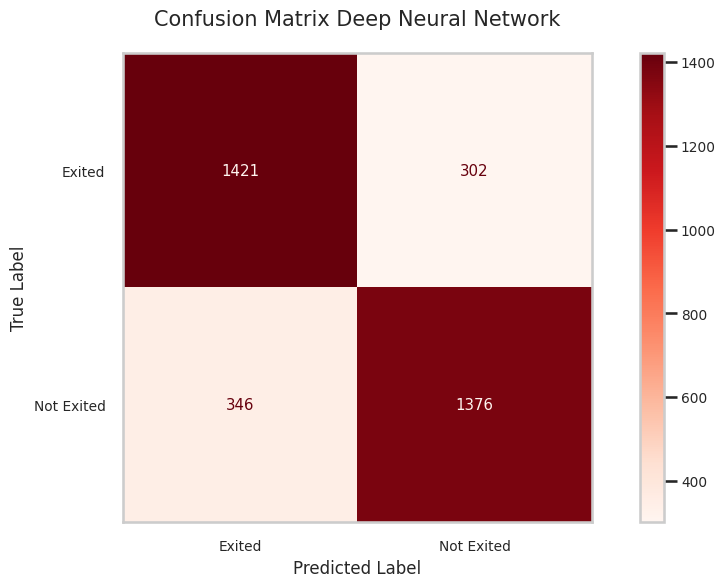

In [ ]:
# Konversi probabilitas prediksi model DNN menjadi kelas biner (0 atau 1)
DNN_y_pred_probs = nn.predict(x_test).flatten()    # Mendapatkan probabilitas prediksi dari model DNN
DNN_y_pred = (DNN_y_pred_probs >= 0.5).astype(int)    # Mengonversi probabilitas ke kelas berdasarkan threshold 0.5
DNN_y_prob = np.column_stack([1 - DNN_y_pred_probs, DNN_y_pred_probs])  # Membuat matriks probabilitas untuk setiap kelas (kelas 0 dan kelas 1)

# Memanggil fungsi evaluate_tuned_model untuk mengevaluasi performa model DNN
# Fungsi ini sebelumnya digunakan untuk mengevaluasi model CatBoost
evaluate_tuned_model(y_test, DNN_y_pred, DNN_y_prob, 'Deep Neural Network')

Model: CatBoost
              precision    recall  f1-score   support

      Exited       0.82      0.83      0.82      1723
  Not Exited       0.82      0.82      0.82      1722

    accuracy                           0.82      3445
   macro avg       0.82      0.82      0.82      3445
weighted avg       0.82      0.82      0.82      3445

----------------------------------------------------------------------------------------------------------------------------------
ROC_AUC Score: 0.90
----------------------------------------------------------------------------------------------------------------------------------


Model: Deep Neural Network (DNN)
              precision    recall  f1-score   support

      Exited       0.80      0.82      0.81      1723
  Not Exited       0.82      0.80      0.81      1722

    accuracy                           0.81      3445
   macro avg       0.81      0.81      0.81      3445
weighted avg       0.81      0.81      0.81      3445

-------------

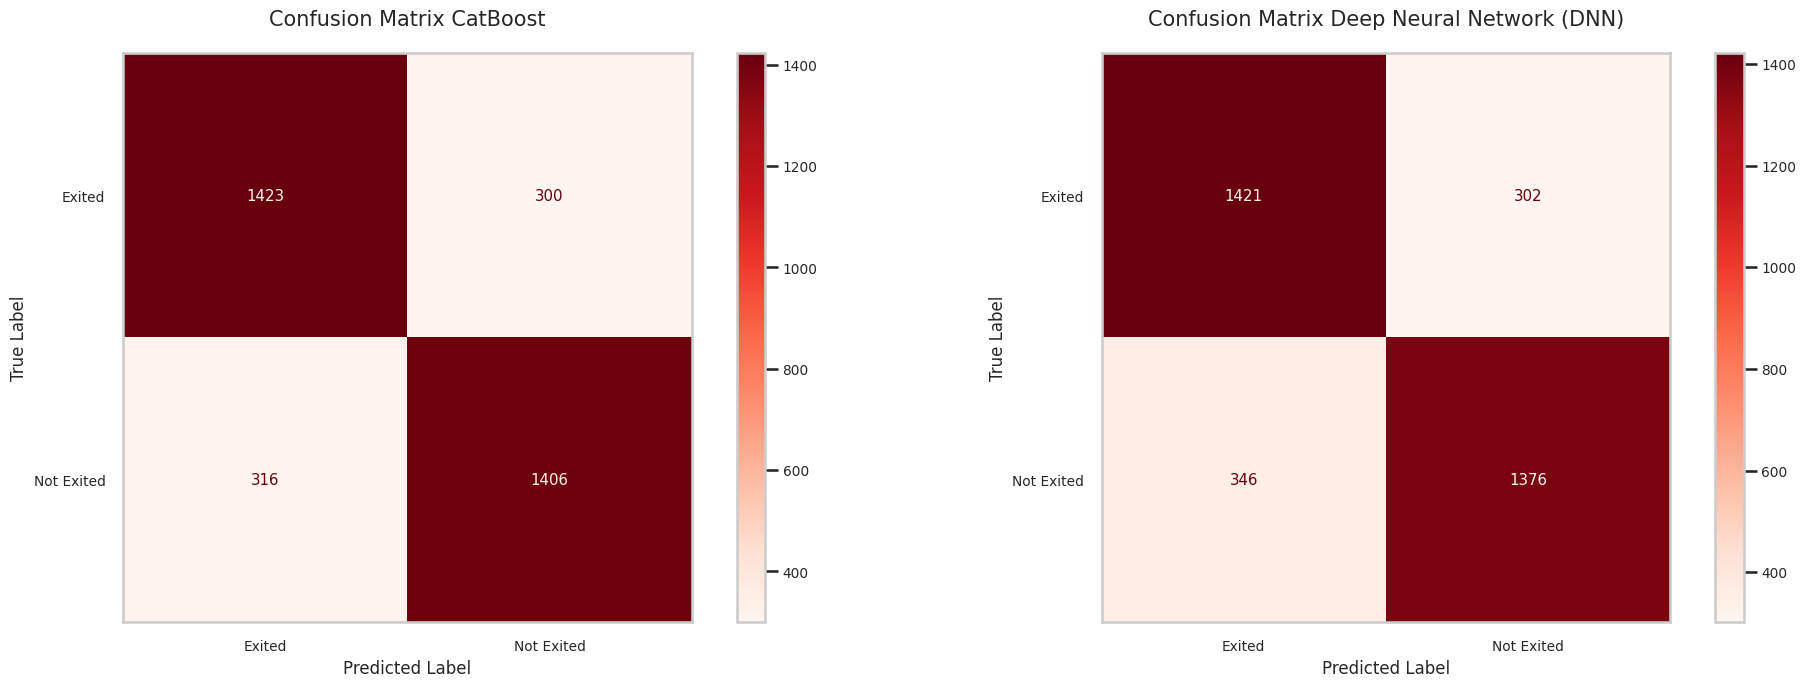

In [ ]:
# Fungsi untuk mengevaluasi model klasifikasi berdasarkan metrik evaluasi utama:
    # - Classification Report (precision, recall, f1-score)
    # - ROC AUC Score
    # - Confusion Matrix dengan visualisasi
# Parameters:
    # - y_test adalah label sebenarnya dari data uji
    # - prediction: Prediksi kelas dari model
    # - probabilities adalah probabilitas output model untuk setiap kelas
    # - model_name adalah nama model yang sedang dievaluasi
    # - ax adalah obyek matplotlib axis untuk subplot
def evaluate_tuned_model(y_test, prediction, probabilities, model_name, ax=None):
  # Normalisasi probabilities untuk setiap kelas
  unik_kelas = np.unique(y_test)  # Mendapatkan daftar kelas unik dalam y_test
  target_names = le.classes_[unik_kelas]   # Mendapatkan nama kelas berdasarkan label encoding

  # Menghasilkan classification report (precision, recall, f1-score)
  report = classification_report(y_test, prediction, target_names=target_names)
  # Menyaring probabilitas hanya untuk kelas yang ada dalam y_test
  probabilities_filtered=probabilities[:, unik_kelas]

  # Menghitung ROC AUC score menggunakan probabilitas kelas positif (kelas 1)
  roc_auc = roc_auc_score(y_test, probabilities[:, 1])

  # Menampilkan hasil evaluasi model
  print(f'Model: {model_name}')
  print(report)
  print('-'*130)
  print(f'ROC_AUC Score: {roc_auc:.2f}')
  print('-'*130)
  print('\n')

  # Menghasilkan confusion matrix
  cm = confusion_matrix(y_test, prediction)
  display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=target_names)

  # Jika ax tidak diberikan, buat figure baru untuk confusion matrix
  if ax is None:
    fig, ax = plt.subplots(figsize=(10,6))

  # Menampilkan confusion matrix dengan warna merah
  display.plot(cmap='Reds',
               ax=ax,
               colorbar=True,
               values_format='d')

  # Menyesuaikan tampilan plot
  ax.grid(False)
  ax.set_title(f'Confusion Matrix {model_name}', fontsize=15, pad=20)
  ax.set_xlabel('Predicted Label', fontsize=12)
  ax.set_ylabel('True Label', fontsize=12)

  # Jika subplot tidak digunakan, sesuaikan tata letak
  if ax is None:
    plt.tight_layout()
  return roc_auc      # Mengembalikan nilai ROC AUC untuk model

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,7))  # Membuat figure dengan dua subplot untuk membandingkan model CatBoost dan DNN

# Evaluasi performa model CatBoost pada subplot pertama
roc_auc_cb = evaluate_tuned_model(y_test,
                                  cb_y_pred_final, cb_y_prob_final,
                                  'CatBoost', ax=ax1)

# Evaluasi performa model Deep Neural Network (DNN) pada subplot kedua
roc_auc_dnn = evaluate_tuned_model(y_test,
                                   DNN_y_pred, DNN_y_prob,
                                   'Deep Neural Network (DNN)', ax=ax2)
plt.tight_layout() # Menyesuaikan tata letak plot
plt.show()

# Analisis dan Interpretasi:

* ditemukan bahwa ada sebanyak 7962 customer yang churn atau sebanyak 79.63% dari disribusi data, dan hanya 2037 customer yang churn 20.37% dari distribusi data.
* jika dilihat dari distribusi data, faktor utama Churn diakibatkan oleh pengaruh Age dari customer. dilihat bahwa usia >30 tahun diidentifikasi customer churn. kemudian pada ketidakaktifan member, dan saldo rekening yang tinggi atau rendah bisa diindikasikan churn yang paling kuat.
* mungkin untuk mengidentifikasi faktor kedua ada pada distribusi geografi dan gender. jika dilihat bahwa letak geografi churn di jerman dan gender adalah laki-laki bisa menunjukkan korelasi dengan tingkat churn yang lebih tinggi.
* faktor Non-signifikan: credit score, estimasi slalary, dan kepemilikan kartu kredit tidak memberikan petunjuk hubungan  yang kuat dengan keputusan churn.
* Tingkat churn konsisten tinggi di semua level gaji. tidak menunjukkan ada perbedaan signifikan dalam distribusi gaji antara kedua kemlompok Salary sekitar $0 - $200rb.
* variablilitas pelanggan yang churn lebih rendah dalam jumlah produk. kemudian untuk number of products distribution jika dilihat perbedaan bahwa produk 1-2 customer churn lebih tinggi dan untuk produk 3-4 tingkat customer churn lebih rendah. untuk pelanggan yang churn memiliki nilai median produk 1.5 sedikit lebih tinggi dari customer tidak churn.
* untuk distribution Balance ditemukan bahwa pelanggan yang churn menunjukkan distribusi $0 dan $100rb sampai $150rb. bahwa diindikasikan sejumlah besar customer yang churn memiliki saldo mendekati $0. sedangkan untuk saldo yang lebih tinggi >$100rb customer churn meningkat signifikan. ditemukan bahwa customer churn memiliki median saldo $79 sedangkan untuk customer tidak churn median saldo $90.
* untuk tingkatan churn level tenature menunjukkan bahwa lama kepemilikan bukan pengaruh kuat terhadap keputusan churn. perbedaan kecil customer yang tidak churn memiliki median tenature sedikit lebih tinggi 5 tahun dibandingkan customer yang churn 5 tahun. kedua kelompok menunjukkan range yang hampir serupa dari 0-10 tahun tapi customer yang tidak churn menunjukkan lama kepemilikan lebih lama tidak mengalami churn.
* pelanggan yang tidak churn di Age adalah customer yang bertahan memiliki distribusi yang lebih merata diseluruh kelompok usia. sedangkan proporsi customer churn meningkat signifikan pada usia >35 tahun.
* Customer beresiko tinggi:
  * pelanggan berusia tua memiliki korelasi positif yaitu 0.29 antara usia dan churn. kemudian customer churn memiliki median usia sekitar 45 tahun dibandingkan 38 tahun yang tidak churn.
  * pemegang saldo tertinggi yang mana cenderung korelasi 0.12 untuk tidak churn. ini mengindikasikan bahwa mereka kelompok tersebut tidak melihat nilai yang cukup dari layanan yang diberikan dibandingkan dengan dana yang mereka simpan.
  * member yang tidak aktif menunjukkan korelasi negatif yaitu -0.16 antara status keanggotaan aktif dan churn. Ketidakaktifan menjadi penanda jelas untuk risiko churn.
* pola penggunaan produk memiliki korelasi negatif antara jumlah produk dan saldo. terdapat korelasi -0.30, customer dengan belih banyak produk cenderung memiliki saldo lebih rendah.
* performa model:
  * Model CatBoost menghasilkan prediction churn yang lebih baik. dengan menangani class imbalance dengan SMOTE+Tomek menambahkan bobot pada kelas mayoritas dan sekaligus menangani outlier.
  * CatBoost menghasilkan performa yang hampir identif dengan skor akurasi 82% dan skor ROC_AUC 90%, menginformasi keandalan prediksi
  * kemampuan prediksi seimbang dari kedua model memiliki nilai precision dan recall yang seimbang untuk menangani kelas churn dan tidak churn dan membantu untuk mengidentifikasi customer yang akan churn maupun yang loyal.
  * selain menggunakan CatBoost untuk mengidentifikasi customer churn menggunakan multi layer perception atau deep neural networks (DNNs). hasil yang diberikan cukup baik walau masih kalah dengan hasil prediksi CatBoost.
  * CatBoost dari 1723 Customers yang diperdiksi, model berhasil memprediksi 1423 khasus dengan benar atau True positif = 82.6% dan gagal 300 khasus atau False Negatif dengan 17.4%.
  * Deep Neural Networks (DNNs) hampir menunjukkan khasus customer churn prediksi hampir sama dengan CatBoost yaitu 1421 khasus benar atau True positif = 82.5% dan gagal 302 khasus atau False Negatif = 17.5%.
  * Namun untuk mengidentifikasi tidak churn CatBoost lebih kuat dengan dengan skor Recall untuk CatBoost = 82% menghasilkan True Positif = 1406 khasus dan False Negatif = 316 khasus, sedangkan DNNs memberikan skor recall = 80% menghasilkan True Positif = 1376 khasus dan False Negatif = 346 khasus. Kedua model menunjukkan performa yang sangat konsisten dalam semua metrik, dengan CatBoost sedikit unggul. Ini mengindikasikan bahwa pola churn dalam dataset cukup jelas dan dapat diidentifikasi dengan berbagai pendekatan algoritma.
  * kesimpulan dari kedua model yang dipergunakan menunjukkan kemampuan prediktif yang kuat dan seimbang untuk memprediksi churn pelanggan, dengan CatBoost sedikit lebih unggul. Hasil ini memberikan kepercayaan tinggi bahwa model-model ini dapat digunakan dalam pengambilan keputusan strategis untuk program retensi pelanggan. Model terbaik kemungkinan ditentukan oleh pertimbangan implementasi praktis seperti kecepatan inferensi, kemudahan pemeliharaan, dan kebutuhan interpretasi.

